In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

In [4]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y, test_size= 0.2, random_state=50)

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_prd = logreg.predict(X_test)
Y_prd

d:\ana\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [6]:
logreg.score(X_test,Y_test)

0.7272727272727273

In [20]:
y_pred_probs = logreg.predict_proba(X_test)[:,1]
y_pred_probs

array([0.30927727, 0.95389802, 0.19851333, 0.09904322, 0.10966806,
       0.226511  , 0.03163839, 0.26051786, 0.46481827, 0.42024076,
       0.04321821, 0.02421513, 0.04124676, 0.09997156, 0.24186381,
       0.14517376, 0.81019723, 0.47940409, 0.37287743, 0.17858934,
       0.93443721, 0.04112564, 0.39566403, 0.12438286, 0.07905808,
       0.22722132, 0.60635803, 0.21856668, 0.70763413, 0.93223271,
       0.11168431, 0.10396336, 0.01910086, 0.37312157, 0.25659202,
       0.10553881, 0.09841762, 0.23134047, 0.73288839, 0.09874018,
       0.38033743, 0.35207071, 0.08214011, 0.06236469, 0.06714224,
       0.07888607, 0.67591208, 0.0712956 , 0.46982611, 0.1110258 ,
       0.23395566, 0.13626596, 0.30844756, 0.52010363, 0.13509786,
       0.25427842, 0.2043222 , 0.6389748 , 0.10869433, 0.04099372,
       0.4585428 , 0.06673099, 0.29312113, 0.38125614, 0.46119054,
       0.68020726, 0.31088742, 0.46659177, 0.67867446, 0.23424366,
       0.04396712, 0.23826102, 0.55650384, 0.01581215, 0.63363

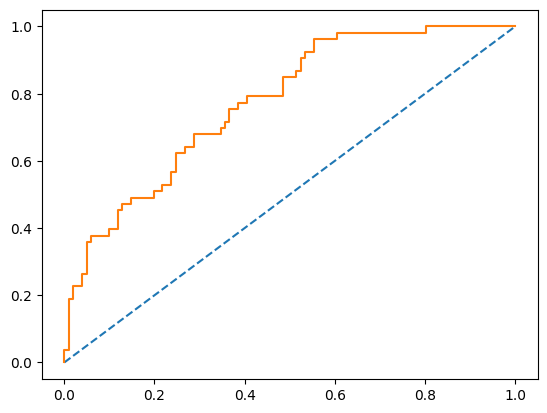

In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr , tpr ,  thresholds = roc_curve(Y_test,y_pred_probs)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr)
plt.show()

In [25]:
from sklearn.metrics import  roc_auc_score , RocCurveDisplay

roc_auc_score(Y_test,y_pred_probs)

0.7733980945264338